# TIENDA DE HELADOS
#### En esta demostración vamos predecir los clientes esperados en una tienda de helados dada una temperatura exterior particular. 
#### Considere una heladería, con un propietario que no sabe leer y escribir. Él te dice:
#### •	si la temperatura es alta , la heladería está llena.
#### •	si la temperatura es moderada , la heladería está ocupada.
#### •	si la temperatura es buena , la heladería está quieta.
#### Para este sistema, tenemos dos variables universales: temp y n_clientes.


In [2]:
# Importamos las librerías NumPy y Skfuzzy  
import  numpy  as np 
import  skfuzzy  as  fuzz
import matplotlib.pyplot as plt

# DESCRIBIR SISTEMA FUZZY 
#### Creamos las funciones difusas de membrecía que representen el grado de verdad relacionado con una variable continua.

In [3]:
# Se generan arreglos para las funciones temperatura en grados Fahrenheit y clientes para una capacidad de 35 personas
# np.arange (inicio, parar, pasos)

temp = np.arange(30, 101, 1)
clientes = np.arange(0, 36, 1)

# Creamos las Funciones de membresía trimf (triangular)  para temperatura caliente, moderada y frio

t_caliente = fuzz.trimf(temp, [65, 100, 100])
t_moderada = fuzz.trimf(temp, [30, 65, 100])
t_frio = fuzz.trapmf(temp, [20, 20, 30, 65])

# Creamos las Funciones de membresía trimf (triangular) para clientes lleno, moderado y quieto 

c_lleno = fuzz.trimf(clientes, [24, 35, 35])
c_ocupado = fuzz.trimf(clientes, [0, 24, 35])
c_quieto = fuzz.trimf(clientes, [0, 0, 24])

# VISUALIZAR SISTEMA FUZZY

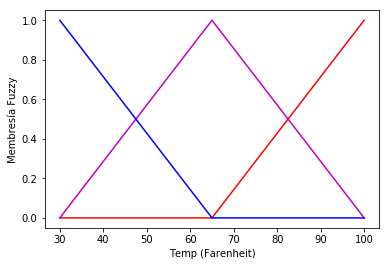

In [4]:
# Visualizar las funciones de membresía para la temperatura 
fig, ax = plt.subplots()

ax.plot(temp, t_caliente, 'r', temp, t_moderada, 'm', temp, t_frio, 'b')
ax.set_ylabel('Membresía Fuzzy')
ax.set_xlabel('Temp (Farenheit)')
ax.set_ylim(-0.05, 1.05);

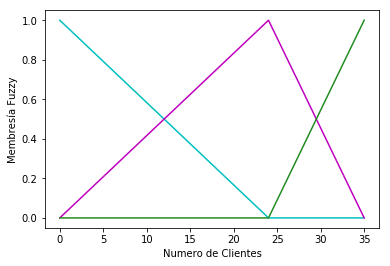

In [5]:
# Visualizar funciones de membresía para los clientes 
fig, ax = plt.subplots()

ax.plot(clientes, c_quieto, 'c', clientes, c_ocupado, 'm', clientes, c_lleno, 'ForestGreen')
ax.set_ylabel('Membresía Fuzzy')
ax.set_xlabel('Numero de Clientes')
ax.set_ylim(-0.05, 1.05); #rango donde se visualiza la membresia fuzzy

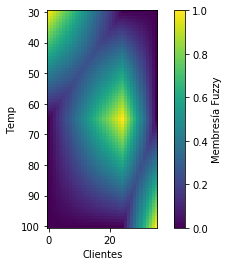

In [6]:
# Relación difusa 
R1 = fuzz.relation_product(t_caliente, c_lleno)
R2 = fuzz.relation_product(t_moderada, c_ocupado)
R3 = fuzz.relation_product(t_frio, c_quieto)

# Combina relaciones difusas en una relación agregada 
R_combinada = np.fmax(R1, np.fmax(R2, R3))

# Visualizar 
plt.imshow(R_combinada)
cbar = plt.colorbar()
cbar.set_label('Membresía Fuzzy')
plt.yticks([i * 10 for i in range(8)], [str(i * 10 + 30) for i in range(8)]);
plt.ylabel('Temp')
plt.xlabel('Clientes');